<a href="https://colab.research.google.com/github/NoarkPol/Find-the-GW-signals/blob/main/baseline_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

gwdata_bootcamp_path = kagglehub.competition_download('2023-gwdata-bootcamp')

#2023_gwdata_bootcamp_path = kagglehub.competition_download('2023-gwdata-bootcamp')
#The issue is that variable names in Python can't start with a number. I

print('Data source import complete.')


100%|██████████| 288M/288M [00:20<00:00, 14.5MB/s]

Extracting files...


Data source import complete.


In [3]:
# 先知晓一下当前的目录地址
!pwd

/content


In [4]:
# 安装必要的程序包
!pip install --upgrade lalsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.0 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp311-cp311-linux_x86_64.whl size=102032 sha256=a9eb11875044d2f58c619a89f339720f050a3df2f05c7646780bd026b57a4832
  Stored in directory: /root/.cache/pip/wheels/02/2b/93/c2ee2b6f4ea9572ee4f5ade0115c4bd0887be6228328740dae
Successfully built ligo-segments


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# PyTorch深度学习框架

PyTorch是一个开源的深度学习框架，由Facebook的人工智能研究团队开发。它提供了两个高级功能：

1. 强大的GPU加速的张量计算（如NumPy）库。
2. 包含自动微分系统的深度神经网络。

PyTorch的设计哲学是“尽可能地保持用户对过程的控制，而不是隐藏复杂的细节”。

这使得PyTorch在研究和开发新的深度学习模型时非常灵活，因为用户可以看到并控制模型的内部操作。

#how to import libraries?

#上传文件到Colab：
您可以将您的Python脚本上传到Colab环境中，然后导入它们。

from google.colab import files

uploaded = files.upload()  

这会打开一个文件选择对话框

上传完成后，您可以导入您的模块

import your_module_name

#从GitHub导入：
如果您的脚本存放在GitHub仓库中，可以直接克隆仓库到Colab：
!git clone https://github.com/your_username/your_repository.git

添加到路径

import sys
sys.path.append('/content/your_repository')

然后导入模块

import your_module_name

#创建Python文件：
您也可以直接在Colab中创建新的Python文件：
%%writefile module_name.py

在这里写入您的代码

def your_function():
    return "Hello World"
    
然后导入它：

import module_name

#调整Python路径：
像您已经开始做的那样，使用sys.path.append()添加您的模块所在的目录：
pythonimport sys
sys.path.append('/path/to/your/modules')




- 这部分代码主要是引入所需要的库

In [6]:
# 加载我给同志们准备好的程序脚本
'''import sys
sys.path.append('/kaggle/input/2023-gwdata-bootcamp')

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")'''


#function not



'import sys\nsys.path.append(\'/kaggle/input/2023-gwdata-bootcamp\')\n\nimport warnings\nwarnings.filterwarnings("ignore", "Wswiglal-redir-stdio")'

In [7]:
!ls /kaggle/input/2023-gwdata-bootcamp

ls: cannot access '/kaggle/input/2023-gwdata-bootcamp': No such file or directory


In [8]:
from google.colab import files

uploaded1 = files.upload()
uploaded2 = files.upload()
uploaded3 = files.upload()

from main import *
from utils import *
from data_prep_bbh import *

#import * means import all funcs & varis in the function

Saving data_prep_bbh.py to data_prep_bbh.py


Saving main.py to main.py


Saving utils.py to utils.py


/content/data_prep_bbh.py:4: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


## Train

这段代码是一个使用PyTorch进行二分类任务的例子，任务是通过引力波数据（噪声+信号）来进行分类。

首先，我们创建了一个数据生成器DatasetGenerator，它用于生成训练和测试数据集。每个epoch的样本数为100，信噪比为20。

然后，我们使用PyTorch的DataLoader创建了训练和测试数据加载器，批处理大小为32，数据在每个epoch后都会被打乱。

接着，我们加载了预训练的模型，如果没有预训练的模型，就会初始化一个新的模型。模型和损失历史的输出路径为./checkpoints_cnn/。
（. 表示 当前目录。）

然后，我们设置了优化器的参数，学习率为0.003，总的训练轮数为100，如果有预训练的模型，训练轮数会加上已经训练过的轮数。

最后，我们调用train函数开始训练模型。训练过程中，模型会在每个epoch后在测试集上进行评估，并保存测试损失最小的模型。

loss 0.0277, train acc 0.500, test acc 0.500
679.5 examples/sec on cuda


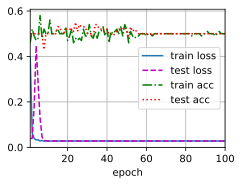

In [9]:
# 初始化数据生成 class
nsample_perepoch = 100  # 每个epoch的样本数
dataset_train = DatasetGenerator(snr=20, nsample_perepoch=nsample_perepoch)  # 训练数据集
dataset_test = DatasetGenerator(snr=20, nsample_perepoch=nsample_perepoch)  # 测试数据集

# 创建一个DataLoader
data_loader = DataLoader(dataset_train, batch_size=32, shuffle=True,)  # 训练数据加载器
test_iter = DataLoader(dataset_test, batch_size=32, shuffle=True,)  # 测试数据加载器

device = torch.device('cuda')  # 使用CUDA设备

# 模型和损失历史的输出路径
checkpoint_dir = './checkpoints_cnn/'

# 创建模型
net, epoch, train_loss_history = load_model(checkpoint_dir)  # 加载模型
net.to(device);  # 将模型转移到设备上

# 优化器参数
lr = 0.003  # 学习率
total_epochs = 100  # 总的训练轮数
total_epochs += epoch  # 加上已经训练过的轮数
output_freq = 1  # 输出频率

# 训练模型
train(net, lr, nsample_perepoch, epoch, total_epochs,
      dataset_train, data_loader, test_iter,
      train_loss_history, checkpoint_dir, device, notebook=True)

## Evaluate

这段代码定义了一个函数evaluate_gpu，用于在GPU上计算模型在数据集上的预测结果。

首先，我们检查输入的模型net是否是nn.Module的实例。如果是，我们将模型设置为评估模式，并获取模型的设备。如果用户没有指定设备，我们将使用模型的第一个参数所在的设备。

然后，我们定义了一个softmax函数，用于将模型的输出转换为概率。

接着，我们创建了两个空列表y_hat_list和y_list，用于存储模型的预测结果和真实标签。

然后，我们进入一个无需计算梯度的环境中，遍历数据加载器data_iter中的所有批次。对于每个批次，我们将数据和标签转移到设备上，并转换为适当的数据类型。然后，我们将数据通过模型进行前向传播，得到预测结果。

接着，我们将预测结果通过softmax函数转换为概率，并将其转移到CPU上，然后转换为NumPy数组，取出正类的概率，并转换为列表。我们也将标签转移到CPU上，然后转换为NumPy数组，并转换为列表。

最后，我们将预测结果和标签添加到y_hat_list和y_list中，并在遍历完所有批次后，将这两个列表转换为NumPy数组并返回。

这个函数可以用于在训练过程中的每个epoch后，或者在训练完成后，评估模型在验证集或测试集上的性能。

In [10]:
# 加载必要的库
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal  # https://git.ligo.org/lscsoft/lalsuite/-/issues/300
from main import *
from utils import *
from tqdm import tqdm
from sklearn.metrics import roc_auc_score, roc_curve

def evaluate_gpu(net, data_iter, device=None):
    """使用GPU计算模型在数据集上的预测结果"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device  # 获取设备信息
    softmax = nn.Softmax(dim=-1)  # 定义softmax函数，dim=-1表示在最后一个维度上进行softmax运算
    y_hat_list = []  # 初始化预测结果列表
    y_list = []  # 初始化标签列表
    with torch.no_grad():  # 不进行梯度计算
        for X, y in data_iter:  # 遍历数据集
            X = X.to(device).to(torch.float)  # 将数据转移到设备上并转换为浮点型
            y = y.to(device).to(torch.long)  # 将标签转移到设备上并转换为长整型
            y_hat = net(X)  # 使用模型进行预测

            preds = softmax(y_hat).cpu().numpy()[:,1].tolist()  # 使用softmax函数处理预测结果，并转换为列表
            labels = y.cpu().numpy().tolist()  # 将标签转换为列表

            y_hat_list.extend(preds)  # 将预测结果添加到预测结果列表
            y_list.extend(labels)  # 将标签添加到标签列表
    return np.asarray(y_hat_list), np.asarray(y_list)  # 返回预测结果和标签的numpy数组```

下面这段代码是一个使用PyTorch进行二分类任务的例子，任务是通过引力波数据（噪声+信号）来进行分类。

首先，我们创建了一个数据生成器DatasetGenerator，它用于生成测试数据集。每个epoch的样本数为1000，信噪比为20。

然后，我们使用PyTorch的DataLoader创建了测试数据加载器，批处理大小为32，数据在每个epoch后都会被打乱。

In [11]:
nsample_perepoch = 1000 # num of injections
snr = 20  # 信噪比

dataset_test = DatasetGenerator(snr=snr, nsample_perepoch=nsample_perepoch)
data_iter = DataLoader(dataset_test, batch_size=32, shuffle=True,)

GPU available? True


接着，我们加载了预训练的模型。如果没有预训练的模型，就会初始化一个新的模型。模型和损失历史的输出路径为 `./checkpoints_cnn/`。

In [12]:
# load model
device = torch.device('cuda')

# Where we output our model and loss history
checkpoint_dir = './checkpoints_cnn/'

# Creat model
net, epoch, train_loss_history = load_model(checkpoint_dir)
net.to(device);

Load network from checkpoints_cnn/model_e1.pt


/content/main.py:146: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(p / files[0])


然后，我们调用evaluate_gpu函数在测试集上进行预测，得到预测结果和真实标签。

In [13]:
y_hat_list, y_list = evaluate_gpu(net, data_iter, device)

接下来，我们使用roc_curve和roc_auc_score函数计算了ROC曲线和AUC值。

In [14]:
fpr, tpr, thresholds = roc_curve(y_list, y_hat_list)
auc = roc_auc_score(y_list, y_hat_list)
auc

0.459192

然后，我们绘制了ROC曲线，并标出了阈值为0.5的点。

In [15]:
index = np.argmax(thresholds < 0.5)

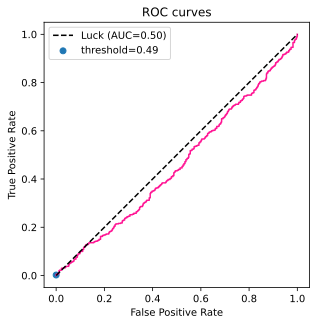

In [16]:
plt.plot(fpr, tpr, color="deeppink")
plt.plot(*(np.linspace(0,1,100),)*2, 'k--', label='Luck (AUC=0.50)')
plt.scatter(fpr[index], tpr[index], label=f'threshold={thresholds[index]:.2f}')
plt.axis("square")
# plt.xscale('log')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves")
plt.legend()
plt.show()

最后，我们对不同的信噪比进行了测试，绘制了不同信噪比下的ROC曲线，并计算了AUC值。

100%|██████████| 4/4 [01:49<00:00, 27.36s/it]


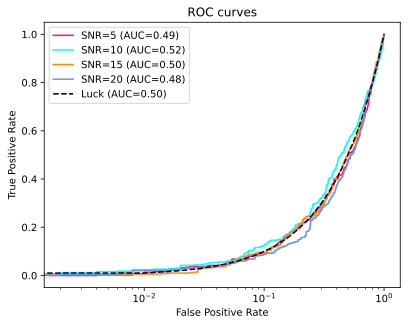

In [17]:
from itertools import cycle
colors = cycle(["deeppink", "aqua", "darkorange", "cornflowerblue"])

nsample_perepoch = 1000
snr_list = [5, 10, 15, 20]
for snr in tqdm(snr_list):
    dataset_test = DatasetGenerator(snr=snr, nsample_perepoch=nsample_perepoch, verbose=False)
    data_iter = DataLoader(dataset_test, batch_size=32, shuffle=True)
    y_hat_list, y_list = evaluate_gpu(net, data_iter, device)

    fpr, tpr, thresholds = roc_curve(y_list, y_hat_list)
    auc = roc_auc_score(y_list, y_hat_list)

    plt.plot(fpr, tpr, color=next(colors), label=f'SNR={snr} (AUC={auc:.2f})')
plt.plot(*(np.linspace(0,1,100),)*2, 'k--', label='Luck (AUC=0.50)')
# plt.axis("square")
plt.xscale('log')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves")
plt.legend()
plt.show()

在最后一部分，我们计算了ROC曲线的误差，并绘制了带有误差的ROC曲线。

这段代码展示了如何使用PyTorch进行二分类任务，并使用ROC曲线和AUC值进行模型评估。

同时，也展示了如何对不同的信噪比进行测试，以及如何计算和绘制带有误差的ROC曲线。

100%|██████████| 3/3 [01:18<00:00, 26.10s/it]


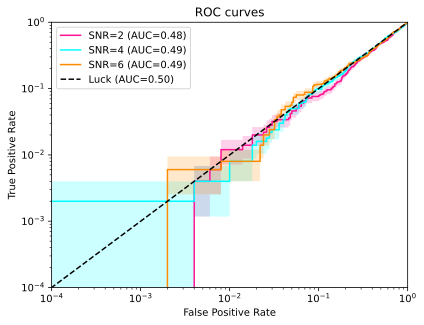

In [18]:
from itertools import cycle
colors = cycle(["deeppink", "aqua", "darkorange", "cornflowerblue"])

def sigma(n, tp):
    """

    :param tp:
    :param n:
    :return:
    """
    return np.sqrt(tp*(1.-tp)/n)

nsample_perepoch = 1000
snr_list = [2, 4, 6]
for snr in tqdm(snr_list):
    dataset_test = DatasetGenerator(snr=snr, nsample_perepoch=nsample_perepoch, verbose=False)
    data_iter = DataLoader(dataset_test, batch_size=32, shuffle=True)
    y_hat_list, y_list = evaluate_gpu(net, data_iter, device)

    fpr, tpr, _ = roc_curve(y_list, y_hat_list)
    auc = roc_auc_score(y_list, y_hat_list)

    fpr_error = [sigma(len(y_list)/2., t) for t in fpr]
    tpr_error = [sigma(len(y_list)/2., t) for t in tpr]

    color = next(colors)
    plt.plot(fpr, tpr, color=color, label=f'SNR={snr} (AUC={auc:.2f})')
    plt.fill_between(fpr, tpr+tpr_error, tpr-tpr_error, alpha=0.2, facecolor=color, zorder=0)
plt.plot(*(np.linspace(0,1,100),)*2, 'k--', label='Luck (AUC=0.50)')
# plt.axis("square")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves")
plt.xlim(1e-4,1)
plt.ylim(1e-4,1)
plt.legend()
plt.show()

# Submission

In [19]:
import lal
import _pickle as pickle
from tqdm import tqdm
from main import *
from utils import *

def evaluate_submissoin_gpu(net, data_iter, device=None):
    """使用GPU计算模型在数据集上的预测结果"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device  # 获取设备信息
    softmax = nn.Softmax(dim=-1)  # 定义softmax函数，dim=-1表示在最后一个维度上进行softmax运算
    y_hat_list = []  # 初始化预测结果列表
    with torch.no_grad():  # 不进行梯度计算
        for X in data_iter:  # 遍历数据集
            X = X.to(device).to(torch.float)  # 将数据转移到设备上并转换为浮点型
            y_hat = net(X)  # 使用模型进行预测
            preds = softmax(y_hat).cpu().numpy()[:,1].tolist()  # 使用softmax函数处理预测结果，并转换为列表
            y_hat_list.extend(preds)  # 将预测结果添加到预测结果列表
    return y_hat_list

In [22]:

#test_dataset = np.load('/kaggle/input/2023-gwdata-bootcamp/test.npy')

test_dataset = files.upload()
#! become a dictionary instead of an array

Saving test.npy to test.npy


In [37]:
import numpy as np
import io

# 加载为 NumPy 数组
file_name = next(iter(test_dataset.keys()))
test_dataset1 = np.load(io.BytesIO(test_dataset[file_name]))

# 验证加载成功
print(f"文件 '{file_name}' 已加载")
print(f"类型: {type(test_dataset)}")
print(f"形状: {test_dataset.shape if hasattr(test_dataset, 'shape') else '无形状信息'}")

文件 'test.npy' 已加载
类型: <class 'dict'>
形状: 无形状信息


In [38]:
data_loader = DataLoader(test_dataset1, batch_size=32, shuffle=False)

In [39]:
# load model
device = torch.device('cuda')

# Where we output our model and loss history
checkpoint_dir = './checkpoints_cnn/'

# Creat model
net, epoch, train_loss_history = load_model(checkpoint_dir)
net.to(device);

Load network from checkpoints_cnn/model_e1.pt


/content/main.py:146: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(p / files[0])


In [40]:
results = evaluate_submissoin_gpu(net, data_loader, device)
len(results)

1200

In [41]:
# results

In [42]:
import pandas as pd
pd.DataFrame({'id': range(len(results)),
              'target': results}, index=None).to_csv('submission.csv', index=False)